# Подготовительный этап

## Описание ДЗ

Источник данных:
https://www.kaggle.com/andrewmvd/animal-faces
(Для загрузки необходима регистрация на kaggle, в верхней части страницы кнопка download для загрузки архива.

Альтернативно - загрузка через kaggle api напрямую в colab: https://colab.research.google.com/github/corrieann/ka..apiin_colab.ipynb)

Задание:

Необходимо реализовать систему классификации лиц животных. Задача представляет из себя классификацию на 3 класса.

1) Необходимо загрузить изображения и привести их к единому формату. Важно понимать, что исходное разрешение очень больше, и простые сети на несколько слоев могут выдать не такое хорошее качество.

2) Необходимо обучить нейросеть для распознавания 3 классов, желательно будет сравнить результаты на нескольких параметрах.

3) Оценить по метрикам качества для каждого класса.

Важно визуализировать результат прогноза (на тесте) в человеко-читаемом формате с подписью.

На "ОТЛИЧНО"

Aугментация изображений.

Файнтюнинг крупной сверточной сети.

Подсказки:

Как найти файлы в папках: https://pythoner.name/walk

Как загрузить изображение по пути:

from PIL import Image

from keras.preprocessing.image import img_to_array

import matplotlib.pyplot as plt

img = np.asarray(Image.open(path_to_image))

plt.imshow(img_to_array(img))

## Список использованных источников

[ШАД. 5.1.Нейронные сети](https://education.yandex.ru/handbook/ml/article/nejronnye-seti)

[ШАД. 5.2.Первое знакомство с полносвязными нейросетями](https://education.yandex.ru/handbook/ml/article/pervoe-znakomstvo-s-polnosvyaznymi-nejrosetyami)

[ШАД. 5.3. Метод обратного распространения ошибки](https://education.yandex.ru/handbook/ml/article/metod-obratnogo-rasprostraneniya-oshibki)

[ШАД. 5.4. Тонкости обучения](https://education.yandex.ru/handbook/ml/article/tonkosti-obucheniya)

[Welcome to PyTorch Tutorials](https://pytorch.org/tutorials/index.html#welcome-to-pytorch-tutorials)

[Ноутбук с кагла](https://www.kaggle.com/code/sbshivambajpai/gan-in-pytorch-with-fid-64)


[Ноутбук с кагла получше](https://www.kaggle.com/code/samithanawarathna/pytorch-low-to-high-resolution-with-srgan)

[Здесь используется Keras, но мне все равно интеерсно посмотреть](https://www.kaggle.com/code/aitordonado/neural-networks-image-classification-animals)

[Посмотреть как индус классифицирует котиков с помощью PyTorch](https://www.youtube.com/watch?v=NvC035A4LUw)

[Плейлист с классификацией животных торчом](https://youtube.com/playlist?list=PL3Dh_99BJkCEhE7Ri8W6aijiEqm3ZoGRq&si=tjFGTopeYEWBlgl5)

## Знакомство с датасетом

![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F793761%2Fafb6d1aa3be4c82e17a0d0b802436e82%2Fafhq_dataset.jpg?generation=1590130743209322&alt=media)

Этот набор данных, также известный, как Animal Faces-HQ (AFHQ), состоит из 16 130 высококачественных изображений с разрешением 512х512.

В наборе три основных класса, каждый из которых содержит около 5000 изображений.

Классы:
- Кошки
- Собаки
- Дикие животные

# EDA

В нашем случае EDA производить нет необходимости =)

Но я все равно посмотрел на песиков и котиков :D

# Загрузка утилит и данных

In [1]:
# импорт утилит, которые нам понадобятся
import os
import torch
from torch import nn
import torchvision
import torchvision.transforms as transforms
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
from keras.preprocessing.image import img_to_array

In [2]:
# код для использования необходимого оборудования (Видеокарты)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('device available: ', device)

device available:  cuda


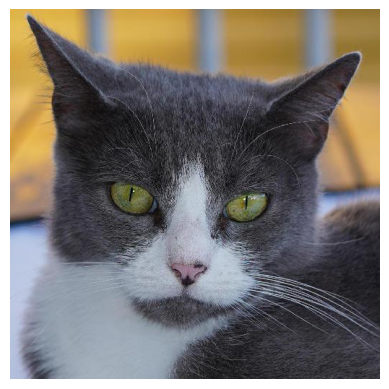

In [4]:
# этот способ нам посоветовали в описании к ДЗ, но он не работал корректно
# спасибо ChatGPT за помощь=)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the image and convert to array
img = np.asarray(Image.open('afhq/train/cat/flickr_cat_000004.jpg'))

# Convert to array with img_to_array (if needed)
img_array = img_to_array(img)

# Normalize the array to [0, 1]
img_array = img_array / 255.0

# Display the image
plt.imshow(img_array)
plt.axis('off')  # Turn off axis
plt.show()

# Создание датасета

In [5]:
# необходимо считывать наши данные корректно
# для начала запишем простой цикл получения наших изображений

image_path = []
labels = []

for i in os.listdir('./afhq/'):
    print(i)
    for label in os.listdir(f'./afhq/{i}'):
        print(label)
        for image in os.listdir(f'./afhq/{i}/{label}'):
            print(image)
            break
        break
    break

.ipynb_checkpoints


Тут у меня появились интересная "проблемка" считывания данных. В каждой папке, кроме папок с картинками, первым индексом у меня '.ipynb_checkpoints'

Мне необходимо от этого избавиться, иначе я не смогу корректно разделить данные

In [6]:
os.listdir()

['.ipynb_checkpoints', 'afhq', 'pavlov_v_f_hw05_Animal Faces.ipynb']

In [7]:
os.listdir('./afhq/train/')

['.ipynb_checkpoints', 'cat', 'dog', 'wild']

In [8]:
os.listdir('./afhq/train/cat/')

['flickr_cat_000003.jpg',
 'flickr_cat_000004.jpg',
 'flickr_cat_000005.jpg',
 'flickr_cat_000006.jpg',
 'flickr_cat_000007.jpg',
 'flickr_cat_000009.jpg',
 'flickr_cat_000010.jpg',
 'flickr_cat_000012.jpg',
 'flickr_cat_000013.jpg',
 'flickr_cat_000014.jpg',
 'flickr_cat_000015.jpg',
 'flickr_cat_000017.jpg',
 'flickr_cat_000018.jpg',
 'flickr_cat_000019.jpg',
 'flickr_cat_000020.jpg',
 'flickr_cat_000021.jpg',
 'flickr_cat_000022.jpg',
 'flickr_cat_000023.jpg',
 'flickr_cat_000024.jpg',
 'flickr_cat_000025.jpg',
 'flickr_cat_000026.jpg',
 'flickr_cat_000027.jpg',
 'flickr_cat_000028.jpg',
 'flickr_cat_000029.jpg',
 'flickr_cat_000030.jpg',
 'flickr_cat_000031.jpg',
 'flickr_cat_000032.jpg',
 'flickr_cat_000033.jpg',
 'flickr_cat_000034.jpg',
 'flickr_cat_000035.jpg',
 'flickr_cat_000036.jpg',
 'flickr_cat_000037.jpg',
 'flickr_cat_000038.jpg',
 'flickr_cat_000039.jpg',
 'flickr_cat_000040.jpg',
 'flickr_cat_000041.jpg',
 'flickr_cat_000042.jpg',
 'flickr_cat_000043.jpg',
 'flickr_cat

In [9]:
# попробую собрать датафрейм, чтобы понять что да как, мб все будет гораздо проще =)

image_path = []
labels = []

for i in os.listdir('./afhq/'):
    for label in os.listdir(f'./afhq/{i}'):
        for image in os.listdir(f'./afhq/{i}/{label}'):
            image_path.append(f'./afhq/{i}/{label}/{image}')
            labels.append(label)

In [10]:
df = pd.DataFrame(zip(image_path, labels), columns = ['image_path', 'labels'])
df.head()

,image_path,labels
0,./afhq/train/cat/flickr_cat_000003.jpg,cat
1,./afhq/train/cat/flickr_cat_000004.jpg,cat
2,./afhq/train/cat/flickr_cat_000005.jpg,cat
3,./afhq/train/cat/flickr_cat_000006.jpg,cat
4,./afhq/train/cat/flickr_cat_000007.jpg,cat


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8184 entries, 0 to 8183
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  8184 non-null   object
 1   labels      8184 non-null   object
dtypes: object(2)
memory usage: 128.0+ KB


In [12]:
df.labels.unique()

array(['cat', 'dog', 'wild'], dtype=object)

In [13]:
df.shape

(8184, 2)

Ну вроде с набором данных все отлично, за одним исключением.

Видимо не все картинки загрузились в юпитерноутбук, но их и правда много.

Вероятно, мне будет лучше изменить путь и подгружать их с ПК.

У нас, если я не ошибаюсь всего должно быть около 15к изображений животных.

In [14]:
df.labels.value_counts()

labels
cat     2788
wild    2741
dog     2655
Name: count, dtype: int64

Хотя, в целом, обучать на датасете, который просто в два раза меньше. Чо бы и нет то=)

А потом уже как раз поправлю, заодно и быстрее обучу сетку =)

# Подготовка данных

## Разбиение данных

In [15]:
# создание трейновой части, которая вмещает 70% данных
train = df.sample(frac = 0.7)
# тестовая создается через удаление данных трейновой части по индексу
test = df.drop(train.index)
# Валидационная часть получить 50% тестовой части или 15% от датасета
val = test.sample(frac = 0.5)
# корректировка тестовой части с поправкой на индексы валидационной
test = test.drop(val.index)

print(train.shape)
print(val.shape)
print(test.shape)

(5729, 2)
(1228, 2)
(1227, 2)


## Кодирование лейблов

In [16]:
label_encoder = LabelEncoder()
label_encoder.fit(df['labels'])

LabelEncoder()

## Создание трансформера

In [147]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.ConvertImageDtype(torch.float32)
])

## Создание Класса

In [154]:
class ImageDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform
        self.labels = torch.tensor(label_encoder.transform(dataframe['labels']), dtype=torch.long).to(device)

    def __len__(self):
        return self.dataframe.shape[0]

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx, 0]
        label = self.labels[idx]

        image = Image.open(img_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image).to(device)

        return image, label

In [155]:
train_dataset = ImageDataset(dataframe = train, transform = transform)
val_dataset = ImageDataset(dataframe = val, transform = transform)
test_dataset = ImageDataset(dataframe = test, transform = transform)

In [156]:
# взглянем на трейновый датасет
train_dataset.__len__()

5729

In [157]:
# посмотрим как теперь выглядит нулевой элемент
train_dataset.__getitem__(1)

(tensor([[[0.6392, 0.6392, 0.6392,  ..., 0.6510, 0.6588, 0.6588],
          [0.6392, 0.6392, 0.6392,  ..., 0.6510, 0.6510, 0.6510],
          [0.6431, 0.6431, 0.6431,  ..., 0.6588, 0.6588, 0.6549],
          ...,
          [0.6196, 0.6275, 0.5961,  ..., 0.7961, 0.7961, 0.7922],
          [0.6039, 0.6000, 0.6039,  ..., 0.8000, 0.8039, 0.8039],
          [0.5725, 0.5961, 0.6000,  ..., 0.8000, 0.8039, 0.8039]],
 
         [[0.6510, 0.6510, 0.6510,  ..., 0.6471, 0.6549, 0.6549],
          [0.6510, 0.6510, 0.6510,  ..., 0.6471, 0.6471, 0.6471],
          [0.6549, 0.6549, 0.6549,  ..., 0.6549, 0.6549, 0.6510],
          ...,
          [0.4118, 0.4196, 0.3882,  ..., 0.8000, 0.8000, 0.7961],
          [0.3961, 0.3922, 0.3961,  ..., 0.8039, 0.8078, 0.8078],
          [0.3647, 0.3882, 0.3922,  ..., 0.8039, 0.8078, 0.8078]],
 
         [[0.6863, 0.6863, 0.6863,  ..., 0.6706, 0.6784, 0.6784],
          [0.6863, 0.6863, 0.6863,  ..., 0.6706, 0.6706, 0.6706],
          [0.6902, 0.6902, 0.6902,  ...,

In [158]:
# посмотрим кто у нас находится под индексом 0
label_encoder.inverse_transform([0])

array(['cat'], dtype=object)

## Визуализируем изображения

В этом нет практической необходимости, но я увидел подобный код и хотел бы его разобрать. Чтобы в будущем, я мог вернуться к нему, в этот ноутбук, и подсмотреть.

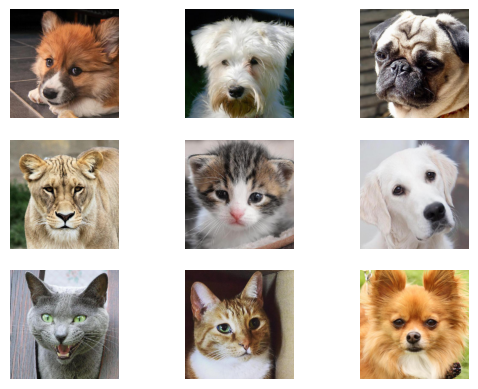

In [159]:
# количество изобрежений
n_rows = 3
n_cols = 3

f, axarr = plt.subplots(n_rows, n_cols)

for row in range(n_rows):
    for col in range(n_cols):
        image = Image.open(df.sample(n = 1)['image_path'].iloc[0]).convert('RGB')
        axarr[row, col].imshow(image)
        axarr[row, col].axis('off')
plt.show()

# Построение модели

In [161]:
LR = 1e-4
BATCH_SIZE = 32
EPOCHS = 10

In [162]:
train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = BATCH_SIZE, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = BATCH_SIZE, shuffle = True)

In [163]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size = 3, padding = 1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size = 3, padding = 1)

        # слой пулинга
        self.pooling = nn.MaxPool2d(2,2)
        
        #функция активации
        self.relu = nn.ReLU()
        
        self.flatten = nn.Flatten()
        self.linear = nn.Linear((128*16*16), 128)
        
        self.output = nn.Linear(128, len(df['labels'].unique()))

    def forward(self, x):
        x = self.conv1(x) # --> (32, 128, 128)
        x = self.pooling(x) # --> (32, 64, 64)
        x = self.relu(x)

        x = self.conv2(x) # --> (64, 64, 64)
        x = self.pooling(x) # --> (64, 32, 32)
        x = self.relu(x)
        
        x = self.conv3(x) # --> (128, 32, 32)
        x = self.pooling(x) # --> (128, 16, 16)
        x = self.relu(x)

        x = self.flatten(x)
        x = self.linear(x)
        x = self.output(x)
        return x


In [164]:
model = Net().to(device)

In [40]:
#!pip install torchsummary

In [165]:
from torchsummary import summary
summary(model, input_size = (3, 128, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 128, 128]             896
         MaxPool2d-2           [-1, 32, 64, 64]               0
              ReLU-3           [-1, 32, 64, 64]               0
            Conv2d-4           [-1, 64, 64, 64]          18,496
         MaxPool2d-5           [-1, 64, 32, 32]               0
              ReLU-6           [-1, 64, 32, 32]               0
            Conv2d-7          [-1, 128, 32, 32]          73,856
         MaxPool2d-8          [-1, 128, 16, 16]               0
              ReLU-9          [-1, 128, 16, 16]               0
          Flatten-10                [-1, 32768]               0
           Linear-11                  [-1, 128]       4,194,432
           Linear-12                    [-1, 3]             387
Total params: 4,288,067
Trainable params: 4,288,067
Non-trainable params: 0
---------------------------

# Обучение

In [166]:
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr = LR)

In [168]:
total_loss_train_plot = []
total_loss_validation_plot = []
total_acc_train_plot = []
total_acc_validation_plot = []

for epoch in range(EPOCHS):
    total_acc_train = 0
    total_loss_train = 0
    total_loss_val = 0
    total_acc_val = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(inputs)
        train_loss = criterion(outputs, labels)
        total_loss_train += train_loss.item()

        train_loss.backward()

        train_acc = (torch.argmax(outputs, axis = 1) == labels).sum().item()

        total_acc_train += train_acc
        optimizer.step()

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            val_loss = criterion(outputs, labels)
            total_loss_val += val_loss.item()

            val_acc = (torch.argmax(outputs, axis = 1) == labels).sum().item()
            total_acc_val += val_acc

    total_loss_train_plot.append(round(total_loss_train / len(train_loader), 4))
    total_loss_validation_plot.append(round(total_loss_val / len(val_loader), 4))

    total_acc_train_plot.append(round((total_acc_train/train_dataset.__len__()) * 100, 4))
    total_acc_validation_plot.append(round((total_acc_val/val_dataset.__len__()) * 100, 4))

    print(f'''Epoch {epoch+1}/{EPOCHS}, Train Loss: {round(total_loss_train/1000, 4)} Train Accuracy: {round((total_acc_train/train_dataset.__len__()) * 100, 4)}
    Validation Loss: {round(total_loss_val/1000, 4)} Validation Accuracy: {round((total_acc_val/val_dataset.__len__()) * 100, 4)}''')
    

C:\Users\Talium\anaconda3\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Epoch 1/10, Train Loss: 0.1317 Train Accuracy: 66.8703
    Validation Loss: 0.0172 Validation Accuracy: 83.7134
Epoch 2/10, Train Loss: 0.0655 Train Accuracy: 86.1756
    Validation Loss: 0.0122 Validation Accuracy: 87.785
Epoch 3/10, Train Loss: 0.0438 Train Accuracy: 91.2201
    Validation Loss: 0.0089 Validation Accuracy: 91.9381
Epoch 4/10, Train Loss: 0.0349 Train Accuracy: 93.2798
    Validation Loss: 0.0078 Validation Accuracy: 92.4267
Epoch 5/10, Train Loss: 0.0276 Train Accuracy: 94.5191
    Validation Loss: 0.0074 Validation Accuracy: 93.1596
Epoch 6/10, Train Loss: 0.022 Train Accuracy: 95.6537
    Validation Loss: 0.0079 Validation Accuracy: 93.0782
Epoch 7/10, Train Loss: 0.0186 Train Accuracy: 96.4566
    Validation Loss: 0.0062 Validation Accuracy: 93.9739
Epoch 8/10, Train Loss: 0.0142 Train Accuracy: 97.2945
    Validation Loss: 0.0055 Validation Accuracy: 95.1954
Epoch 9/10, Train Loss: 0.0121 Train Accuracy: 97.8181
    Validation Loss: 0.0056 Validation Accuracy: 95

# Тестирование

In [169]:
with torch.no_grad():
  total_loss_test = 0
  total_acc_test = 0
  for inputs, labels in test_loader:
    predictions = model(inputs)

    acc = (torch.argmax(predictions, axis = 1) == labels).sum().item()
    total_acc_test += acc
    test_loss = criterion(predictions, labels)
    total_loss_test += test_loss.item()

print(f"Accuracy Score is: {round((total_acc_test/test_dataset.__len__()) * 100, 4)} and Loss is {round(total_loss_test/1000, 4)}")
     

Accuracy Score is: 94.0505 and Loss is 0.0062


# Графики

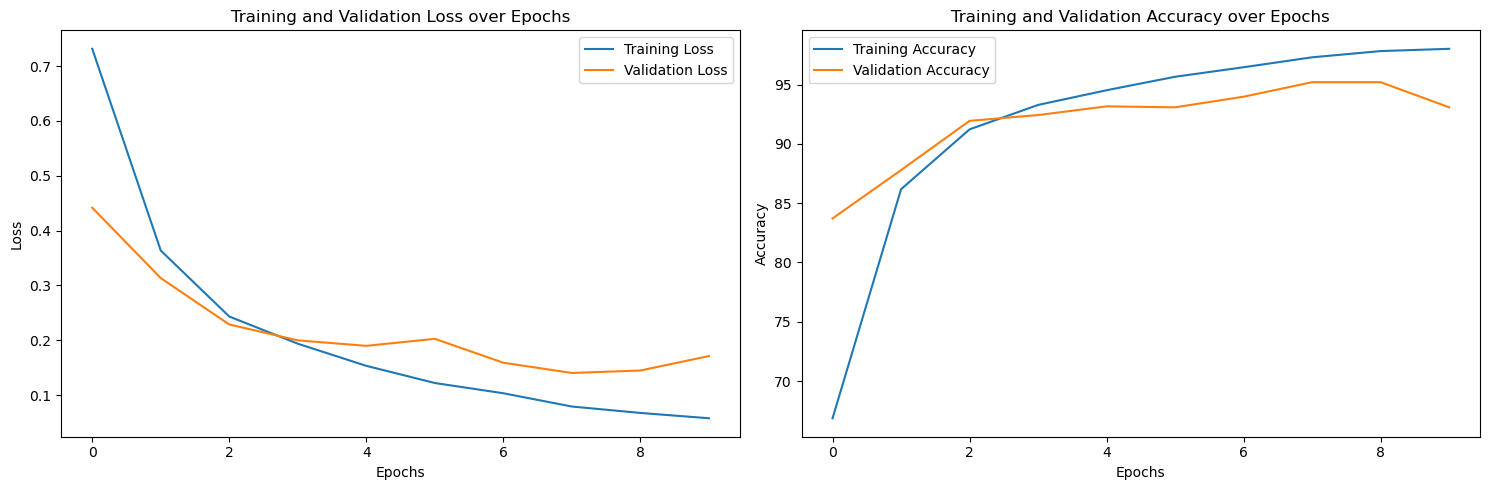

In [170]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axs[0].plot(total_loss_train_plot, label='Training Loss')
axs[0].plot(total_loss_validation_plot, label='Validation Loss')
axs[0].set_title('Training and Validation Loss over Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(total_acc_train_plot, label='Training Accuracy')
axs[1].plot(total_acc_validation_plot, label='Validation Accuracy')
axs[1].set_title('Training and Validation Accuracy over Epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.tight_layout()

plt.show()
     

# Тестирование на моих подопытных

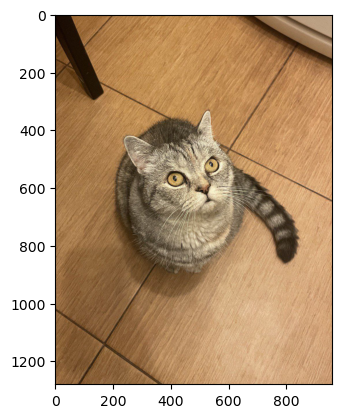


Prediction: 



array(['cat'], dtype=object)

In [178]:
# 1- read image
# 2- Transform using transform object
# 3- predict through the model
# 4- inverse transform by label encoder

def predict_image(image_path):
  image = Image.open(image_path).convert('RGB')
  image = transform(image).to(device)

  output = model(image.unsqueeze(0))
  output = torch.argmax(output, axis = 1).item()
  return label_encoder.inverse_transform([output])

## Visualize the image
image = Image.open("./test/Ласка 01.jpg")
plt.imshow(image)
plt.show()


## Predict
print()
print("Prediction: \n")
predict_image("./test/Ласка 01.jpg")

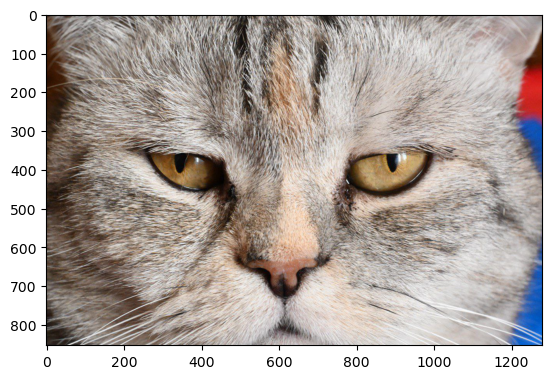


Prediction: 



array(['cat'], dtype=object)

In [180]:
## Visualize the image
image = Image.open("./test/Ласка 02.jpg")
plt.imshow(image)
plt.show()


## Predict
print()
print("Prediction: \n")
predict_image("./test/Ласка 02.jpg")

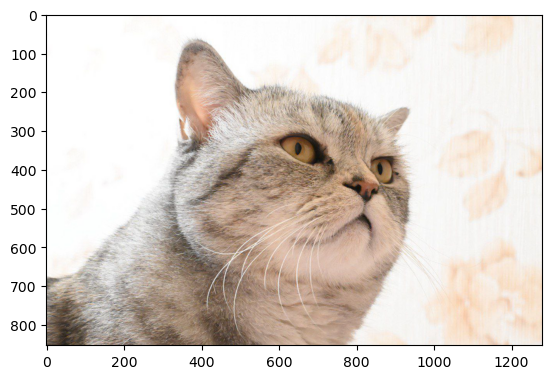


Prediction: 



array(['dog'], dtype=object)

In [181]:
## Visualize the image
image = Image.open("./test/Ласка 03.jpg")
plt.imshow(image)
plt.show()


## Predict
print()
print("Prediction: \n")
predict_image("./test/Ласка 03.jpg")

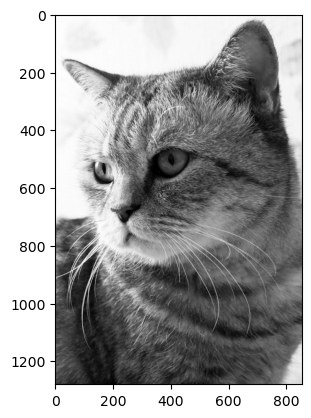


Prediction: 



array(['wild'], dtype=object)

In [182]:
## Visualize the image
image = Image.open("./test/Ласка 04.jpg")
plt.imshow(image)
plt.show()


## Predict
print()
print("Prediction: \n")
predict_image("./test/Ласка 04.jpg")

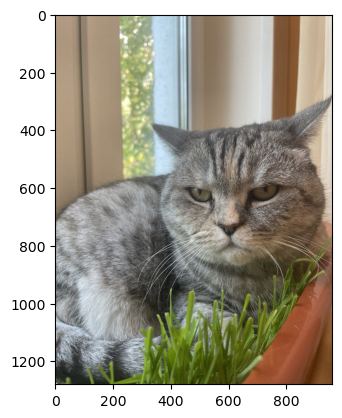


Prediction: 



array(['wild'], dtype=object)

In [183]:
## Visualize the image
image = Image.open("./test/Ласка 05.jpg")
plt.imshow(image)
plt.show()


## Predict
print()
print("Prediction: \n")
predict_image("./test/Ласка 05.jpg")

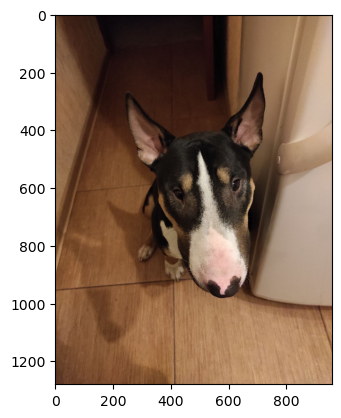


Prediction: 



array(['cat'], dtype=object)

In [185]:
## Visualize the image
image = Image.open("./test/Веня 01.jpg")
plt.imshow(image)
plt.show()


## Predict
print()
print("Prediction: \n")
predict_image("./test/Веня 01.jpg")

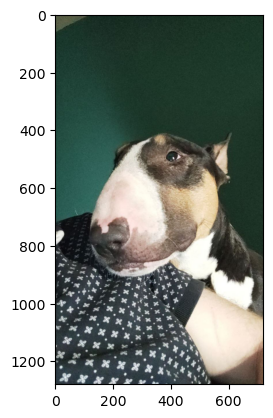


Prediction: 



array(['wild'], dtype=object)

In [187]:
## Visualize the image
image = Image.open("./test/Веня 02.jpg")
plt.imshow(image)
plt.show()


## Predict
print()
print("Prediction: \n")
predict_image("./test/Веня 02.jpg")

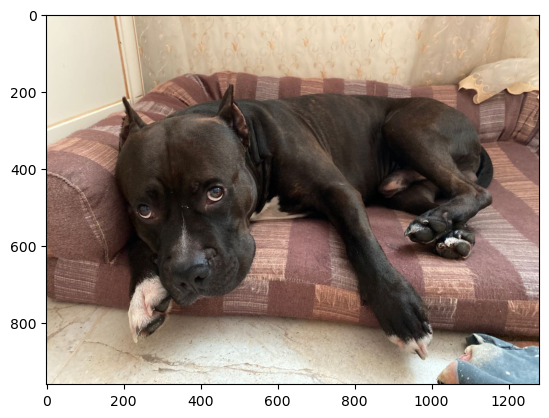


Prediction: 



array(['dog'], dtype=object)

In [188]:
image = Image.open("./test/Муфаса 01.jpg")
plt.imshow(image)
plt.show()


## Predict
print()
print("Prediction: \n")
predict_image("./test/Муфаса 01.jpg")

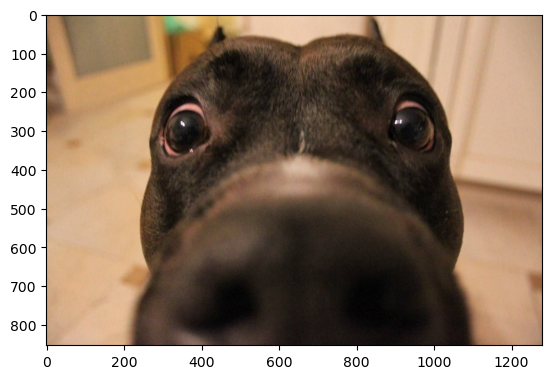


Prediction: 



array(['dog'], dtype=object)

In [189]:
image = Image.open("./test/Муфаса 02.jpg")
plt.imshow(image)
plt.show()


## Predict
print()
print("Prediction: \n")
predict_image("./test/Муфаса 02.jpg")

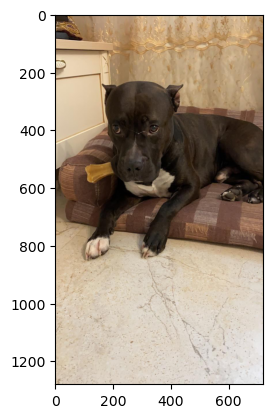


Prediction: 



array(['cat'], dtype=object)

In [192]:
image = Image.open("./test/Муфаса 03.jpg")
plt.imshow(image)
plt.show()


## Predict
print()
print("Prediction: \n")
predict_image("./test/Муфаса 03.jpg")

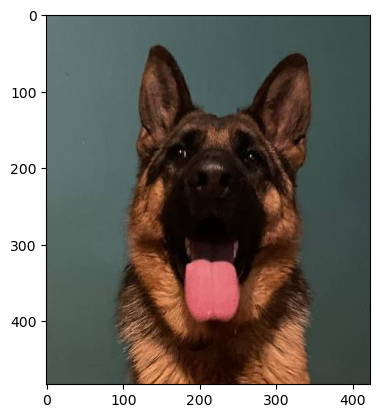


Prediction: 



array(['cat'], dtype=object)

In [197]:
image = Image.open("./test/Овчарка 01.jpg")
plt.imshow(image)
plt.show()


## Predict
print()
print("Prediction: \n")
predict_image("./test/Овчарка 01.jpg")

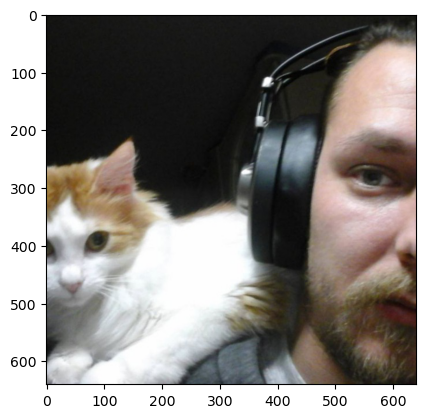


Prediction: 



array(['cat'], dtype=object)

In [198]:
image = Image.open("./test/Никита.jpg")
plt.imshow(image)
plt.show()


## Predict
print()
print("Prediction: \n")
predict_image("./test/Никита.jpg")

# Резюме